# Xarray maps

In this example, we will start exporting [eReefs data](http://thredds.ereefs.aims.gov.au/thredds/catalog.html) using the `Xarray` library and do similar visualisation as the ones we did with `Numpy`.


## Load the required Python libraries

First of all, load the necessary libraries. These are the ones we discussed previously:

+ numpy
+ matplotlib
+ cartopy
+ xarray

In [1]:
import os
import numpy as np
import xarray as xr

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

import cmocean

from matplotlib import pyplot as plt
#%config InlineBackend.figure_format = 'retina'
plt.ion()  # To trigger the interactive inline mode

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

## Build multi-file dataset

We will use the `open_mfdataset` function from `xArray` to open multiple netCDF files into a single xarray Dataset. 

We will query load the GBR4km dataset from the [AIMS server](http://thredds.ereefs.aims.gov.au/thredds/catalog.html), so let's first define the base URL:

In [2]:
# For the bio dataset
base_url = "http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/GBR4_H2p0_B3p1_Cq3b_Dhnd/daily-monthly/EREEFS_AIMS-CSIRO_GBR4_H2p0_B3p1_Cq3b_Dhnd_bgc_daily-monthly-"

# For the hydro dataset
base_url2 = "http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-"

For the sake of the demonstration, we will only use 1 month:

In [4]:
month_st = 1   # Starting month 
month_ed = 1   # Ending month 
year = 2018    # Year

# Based on the server the file naming convention 
biofiles = [f"{base_url}{year}-{month:02}.nc" for month in range(month_st, month_ed+1)]
hydrofiles = [f"{base_url2}{year}-{month:02}.nc" for month in range(month_st, month_ed+1)]

### Loading dataset into xArray

Using `xArray`, we open these files into a `Dataset`:

In [5]:
ds_bio = xr.open_mfdataset(biofiles)
ds_hydro = xr.open_mfdataset(hydrofiles)

In [10]:
ds_bio

<xarray.Dataset>
Dimensions:          (k: 17, latitude: 723, longitude: 491, time: 31)
Coordinates:
    zc               (k) float64 dask.array<chunksize=(17,), meta=np.ndarray>
  * time             (time) datetime64[ns] 2018-01-01T02:00:00 ... 2018-01-31...
  * latitude         (latitude) float64 -28.7 -28.67 -28.64 ... -7.066 -7.036
  * longitude        (longitude) float64 142.2 142.2 142.2 ... 156.8 156.8 156.9
Dimensions without coordinates: k
Data variables: (12/101)
    alk              (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    BOD              (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    Chl_a_sum        (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    CO32             (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    DIC              (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    DIN              (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    ...               ...
    SGH_N            (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    SGH_N_pr         (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    SGHROOT_N        (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    SGROOT_N         (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    TSSM             (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    Zenith2D         (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
Attributes: (12/20)
    Conventions:                     CF-1.0
    NCO:                             netCDF Operators version 4.7.7 (Homepage...
    RunID:                           2
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    aims_ncaggregate_buildDate:      2020-08-21T23:07:30+10:00
    aims_ncaggregate_datasetId:      products__ncaggregate__ereefs__GBR4_H2p0...
    ...                              ...
    paramfile:                       /home/bai155/EMS_solar2/gbr4_H2p0_B3p1_C...
    paramhead:                       eReefs 4 km grid. SOURCE Catchments with...
    technical_guide_link:            https://eatlas.org.au/pydio/public/aims-...
    technical_guide_publish_date:    2020-08-18
    title:                           eReefs AIMS-CSIRO GBR4 BioGeoChemical 3....
    DODS_EXTRA.Unlimited_Dimension:  time

Davies Reef position:

In [7]:
reef_lat = -18.82
reef_lon = 147.64

## Plotting Xarray dataset

We will use the `Xarray` `plot` function.

:::{seealso}
Check out this [link](https://xarray-contrib.github.io/xarray-tutorial/scipy-tutorial/04_plotting_and_visualization.html) to see how to use `Xarray`’s convenient matplotlib-backed plotting interface to visualize your datasets! 
:::

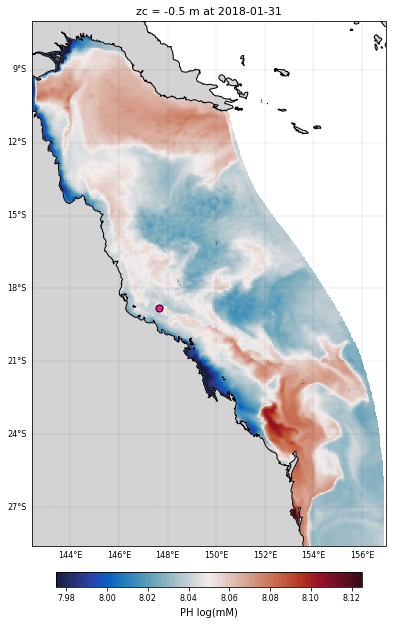

<Figure size 432x288 with 0 Axes>

In [25]:
# Figure size
size = (9, 10)

# Color from cmocean
color = cmocean.cm.balance

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([142.4, 157, -7, -28.6], ccrs.PlateCarree())

# Plotting using Matplotlib 
# We plot the PH at the surface at the final recorded time interval
cf = ds_bio.PH.isel(time=-1,k=-1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 7.975, vmax = 8.125,
    add_colorbar=False
)

# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_bio.PH.long_name+' '+ds_bio.PH.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title('zc = '+str(ds_bio.zc.values.item(-1))+' m at '+str(ds_bio.coords['time'].values[-1])[:10],
          fontsize=11
         )

# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)

# Site Davies Reef
ax.scatter(reef_lon, reef_lat, c='deeppink', s=50, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

### Clip the Dataset

To reduce the `Dataset` size we will clip the spatial extent based on longitudinal and latitudinal values. 

This is easely done using the `sel` function with the `slice` method.

In [15]:
min_lon = 146     # lower left longitude
min_lat = -21     # lower left latitude
max_lon = 150     # upper right longitude
max_lat = -16     # upper right latitude

# Defining the boundaries
lon_bnds = [min_lon, max_lon]
lat_bnds = [min_lat, max_lat]

# Performing the reduction
ds_bio_clip = ds_bio.sel(latitude=slice(*lat_bnds), longitude=slice(*lon_bnds))
ds_hydro_clip = ds_hydro.sel(latitude=slice(*lat_bnds), longitude=slice(*lon_bnds))

Let's plot the clipped region using the same approach as above:

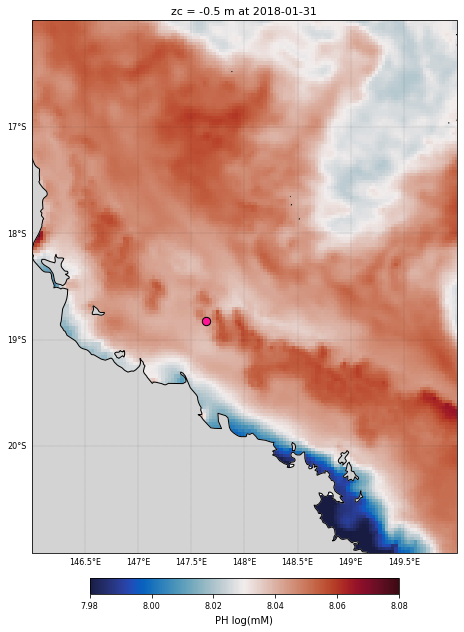

<Figure size 432x288 with 0 Axes>

In [18]:
# Figure size
size = (9, 10)

# Color from cmocean
color = cmocean.cm.balance

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([min_lon, max_lon, min_lat, max_lat], ccrs.PlateCarree())

# Plotting using Matplotlib 
# We plot the PH at the surface at the final recorded time interval
cf = ds_bio_clip.PH.isel(time=-1,k=-1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 7.98, vmax = 8.08,
    add_colorbar=False
)

# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_bio_clip.PH.long_name+' '+ds_bio_clip.PH.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title('zc = '+str(ds_bio_clip.zc.values.item(-1))+' m at '+
          str(ds_bio_clip.coords['time'].values[-1])[:10],
          fontsize=11
         )

# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)

# Site Davies Reef
ax.scatter(reef_lon, reef_lat, c='deeppink', s=70, edgecolors='k', 
           linewidth=1, transform=ccrs.PlateCarree())

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

## Adding a quiver plot on top

To make the quiver plot, we will first resample the dataset and take one point every 7 times. It allows to have less arrows on the map making it more readable.

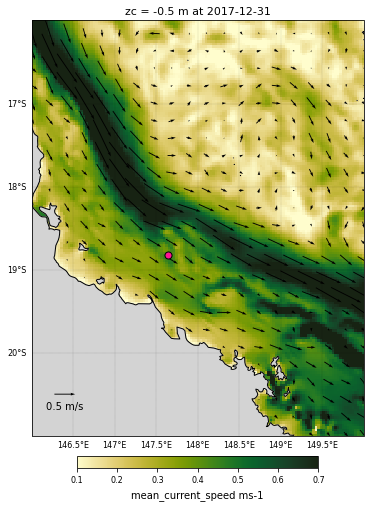

<Figure size 432x288 with 0 Axes>

In [20]:
# Figure size
size = (7, 8)

# Time step to plot
timevar = 0

# z-coordinate position (here the top one)
zcvar = -1

# Color from cmocean
color = cmocean.cm.speed

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', 
                 edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([min_lon, max_lon, min_lat, max_lat], 
              ccrs.PlateCarree())

# Plotting using Matplotlib the mean current
cf = ds_hydro_clip.mean_cur.isel(time=timevar,k=zcvar).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 0.1, vmax = 0.7,
    add_colorbar=False
)

# Resampling using the slice method
resample = ds_hydro_clip.isel(time=timevar,k=zcvar,longitude=slice(None, None, 7),
                              latitude=slice(None, None, 7))

# Defining the quiver plot
quiver = resample.plot.quiver(x='longitude', y='latitude', u='u', v='v', 
                              transform=ccrs.PlateCarree(), scale=8)      

# Vector options declaration
veclenght = 0.5
maxstr = '%3.1f m/s' % veclenght
plt.quiverkey(quiver,0.1,0.1,veclenght,maxstr,labelpos='S', 
              coordinates='axes').set_zorder(11)


# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_hydro_clip.mean_cur.long_name+' '+
               ds_hydro_clip.mean_cur.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title('zc = '+str(ds_hydro_clip.mean_cur.zc.values.item(zcvar))+' m at '+
          str(ds_hydro_clip.mean_cur.coords['time'].values[timevar])[:10],
          fontsize=11
         )

# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)

# Site Davies Reef
ax.scatter(reef_lon, reef_lat, c='deeppink', s=50, edgecolors='k', 
           linewidth=1, transform=ccrs.PlateCarree()).set_zorder(11)

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

## Cross-sections on Xarray dataset

To define the cross-section, we chose to select (`sel`) several latitudes or longitudes and compute the mean along the opposite dimension:

In [22]:
# Section along the longitude
lonsec = ds_bio_clip.sel(latitude=slice(*[-19.,-18.5])).mean(dim=('latitude'),skipna=True)

# Section along the latitude
latsec = ds_bio_clip.sel(longitude=slice(*[147.2,148.])).mean(dim=('longitude'),skipna=True)

Let's visualise the selected mean cross-sections:

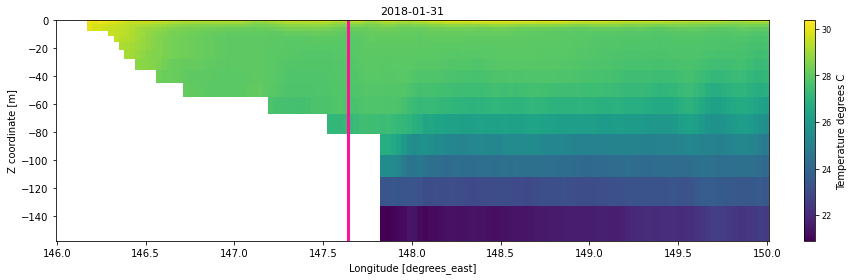

<Figure size 432x288 with 0 Axes>

In [23]:
# Figure size
size = (12, 4)

# Time step to plot
timevar = -1

# Color from cmocean
color = cmocean.cm.speed

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')
ax = plt.axes()

# Plotting using Matplotlib the temperature over the z-coordinate
sec = lonsec.temp.isel(time=timevar).plot(y="zc", add_colorbar=False)

# Color bar
cbar = fig.colorbar(sec, ax=ax, fraction=0.027, pad=0.045)
cbar.set_label(ds_bio.temp.long_name+' '+
               ds_bio.temp.units, rotation=90, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title(str(lonsec.temp.coords['time'].values[timevar])[:10],
          fontsize=11
         )

# Site Davies Reef visualised as a line
ax.plot([reef_lon,reef_lon], [-1000,16], c='deeppink',  
           linewidth=3)

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

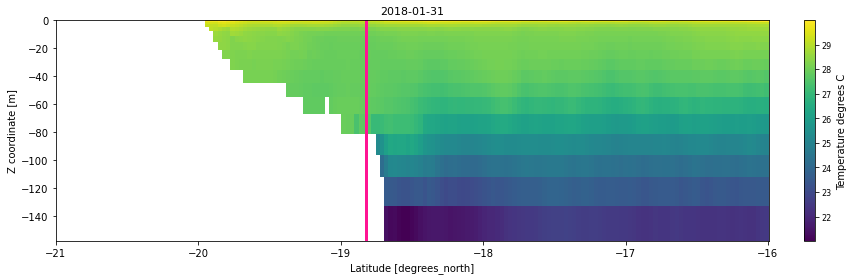

<Figure size 432x288 with 0 Axes>

In [24]:
# Figure size
size = (12, 4)

# Time step to plot
timevar = -1

# Color from cmocean
color = cmocean.cm.speed

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')
ax = plt.axes()

# Plotting using Matplotlib the temperature over the z-coordinate
sec = latsec.temp.isel(time=timevar).plot(y="zc",add_colorbar=False)

# Color bar
cbar = fig.colorbar(sec, ax=ax, fraction=0.027, pad=0.045)
cbar.set_label(ds_bio.temp.long_name+' '+
               ds_bio.temp.units, rotation=90, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title(str(latsec.temp.coords['time'].values[timevar])[:10],
          fontsize=11
         )

# Site Davies Reef visualised as a line
ax.plot([reef_lat,reef_lat], [-1000,16], c='deeppink',  
           linewidth=3)

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()